In [41]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [42]:
beta=4.03
ml=0.15
mh=0.15
ncstart=100
ncfinish=2100
step=5
NCFG=(ncfinish-ncstart)/step

In [43]:
userDir=os.path.expanduser('~')
dataDir=os.path.join(userDir,'LatticeData','PiPi','b{}_ml{}_mh{}'.format(beta,ml,mh))
pionDir=os.path.join(dataDir,'mesons')

In [47]:
def mesonDatasetToNumpy(dataset):
    data = dataset['corr']
    arr = []
    for elem in data:
        arr.append(complex(elem[0],elem[1]))
    return np.array(arr)

In [61]:
pionCorrs=[]
for cfg in range(ncstart, ncfinish, step):
    fileName=os.path.join(pionDir,'wall_ll.{}.h5'.format(cfg))
    file = h5py.File(fileName,'r')
    meson0=file['meson']['meson_0']
    corr = mesonDatasetToNumpy(meson0)
    pionCorrs.append(corr)

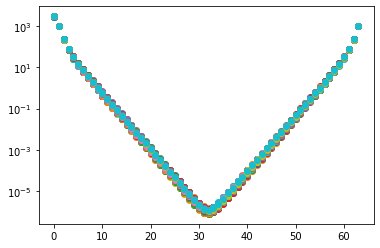

In [62]:
plt.yscale('log')
for corr in pionCorrs:
    plt.plot(np.real(corr),linestyle="",marker="o")
plt.show()